##Przewidzieć czy grzyb jest jadalny, czy niejadalny?

In [1]:
import pandas as pd
import numpy as np
from numpy.random import RandomState
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [35]:
df=pd.read_csv('secondary_data.csv', sep=';')

In [46]:
pd.set_option('display.max_columns', None)

In [48]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w


In [38]:
df.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [20]:
df.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [14]:
df['cap-diameter'].unique()

array([15.26, 16.6 , 14.07, ..., 22.85, 21.8 , 20.42])

In [39]:
df.isna().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [52]:
df['class'].value_counts()

p    33888
e    27181
Name: class, dtype: int64

In [49]:
df['cap-diameter'].value_counts()

a    12698
d    10247
x     7413
p     6001
e     5648
s     5648
f     3530
Name: gill-attachment, dtype: int64

In [50]:
df['cap-shape'].value_counts()

c    24710
d     7766
f     3530
Name: gill-spacing, dtype: int64

In [53]:
df['cap-color'].value_counts()

n    24218
y     8543
w     7666
g     4420
e     4035
o     3656
r     1782
u     1709
p     1703
k     1279
b     1230
l      828
Name: cap-color, dtype: int64

In [54]:
df['does-bruise-or-bleed'].value_counts()

f    50479
t    10590
Name: does-bruise-or-bleed, dtype: int64

In [55]:
df['gill-color'].value_counts()

w    18521
n     9645
y     9546
p     5983
g     4118
f     3530
o     2909
k     2375
r     1399
e     1066
u     1023
b      954
Name: gill-color, dtype: int64

In [58]:
df['class1'] = df['class'].factorize(['p','e'])[0] #factorize - robi 2 podzbiory; jeden z 0, drugi z p i e 

In [59]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,class1
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w,1
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u,1
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w,1
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w,1
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w,1


In [65]:
df['cap-diameter1'] = df['cap-diameter'].factorize(['a','d','x','p','e','s','f'])[0]

In [61]:
df['cap-shape1'] = df['cap-shape'].factorize(['c','d','f'])[0]

In [62]:
df['cap-color1'] = df['cap-color'].factorize(['n','y','w','g','e','o','r','u','p','k','b','l'])[0]

In [63]:
df['does-bruise-or-bleed1'] = df['does-bruise-or-bleed'].factorize(['f','t'])[0]

In [64]:
df['gill-color1'] = df['gill-color'].factorize(['w','n','y','p','g','f','o','k','r','e','u','b'])[0]

In [95]:
#class - Trujący = p, jadalny = e (binarny)
#cap-diameter -  średnica kapelusza (m): liczba zmiennopozycyjna w cm
#cap-shape - kształt czapki (n): bell=b, conical=c, convex=x, flat=f,      zatopiony=s, kulisty=p, inny=o
#cap-surface - powierzchnia czapeczki (n): włóknista=i, rowki=g, łuskowata=y, gładka=s, błyszcząca=h, skórzasta=l, jedwabista=k, lepka=t, pomarszczony=w, mięsisty=e
#cap-color - kolor czapki (n): brązowy=n, buff=b, szary=g, zielony=r, różowy=p, fioletowy=u, czerwony=e, biały=w, żółty=y, niebieski=l, 					orange=o, black=k,
#does-bruise-bleed - siniak-krwawienie (n): Siniak-krwawienie = t, nie = f
#gill-attachment (n) - Przyłączanie skrzelowe (n): Adapter = a, adnestor = x, deurrata = d, wolny = e, sinuate = s, pory = p, brak = f, nieznane =?
#gill-spacing (n) - odstępy między skrzelami (n): close=c, distant=d, none=f
#gill-color - kolor skrzeli (n): patrz kolor kapelusza + brak=f
#stem-height - wysokość łodygi (m): liczba zmiennoprzecinkowa w cm
#stem-width (m) - szerokość łodygi (m): liczba zmiennoprzecinkowa w mm
#stem-root (n) -  korzeń łodygi (n): bulwiasty=b, spuchnięty=s, klubowy=c, kubkowy=u, równy=e, rizomorfy=z, ukorzenione=r
#stem-surface (n) - powierzchnia łodygi (n): patrz powierzchnia pokrywy + brak=f
#stem-color (n) - Patrz kolor-kolor + brak = f
#veil-type (n) - typ welonu (n): Częściowy = p, uniwersalny = u
#veil-color (n) - kolor welonu (n): Patrz kolor-kolor + brak = f
#has-ring (n) - w pierścieniu (n): Ring = t, brak = f
#ring-type (n) - Cobwebby = c, evanescencja = e, flar = r, rowek = g, duży = l, wisiorek = p, powłokę = s, strefa = z, skaly = y, ruchomy = m, żaden = f, nieznany =?
#spore-print-color (n): - kolor zarodników (n): Patrz kolor trzonka
#habitat (n) - siedlisko (n): Trawy = g, liście = l, łąki = m, ścieżki = p, wrzosowiska = h, Miejskie = u, odpady = w, las = d
#season (n) - sezon (n): Wiosna = s, lato = u, jesień = a, zima = w

In [67]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,class1,cap-diameter1,cap-shape1,cap-color1,does-bruise-or-bleed1,gill-color1
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w,1,1481,6,6,0,10
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u,1,1614,6,6,0,10
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w,1,1362,6,6,0,10
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w,1,1372,2,1,0,10
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w,1,1419,6,6,0,10


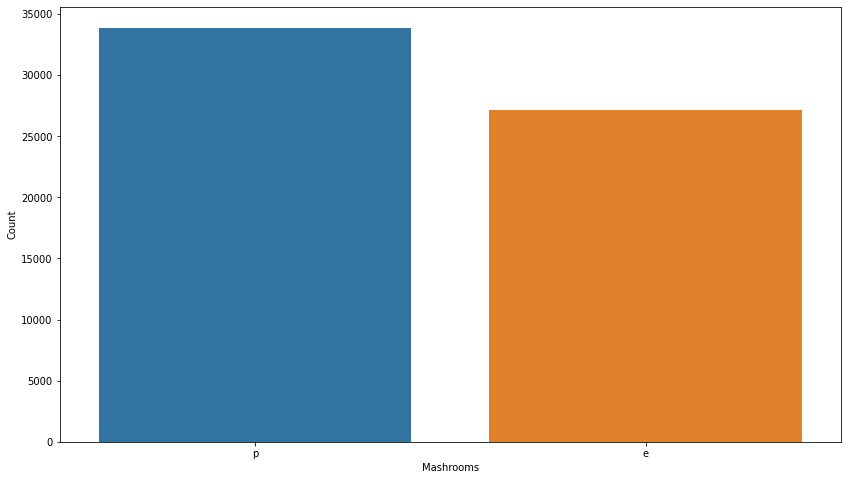

In [77]:
plt.figure(figsize=(14,8))

sns.countplot(x = 'class', data = df)
plt.xlabel('Mashrooms')
plt.ylabel('Count')
plt.title('')

plt.show()

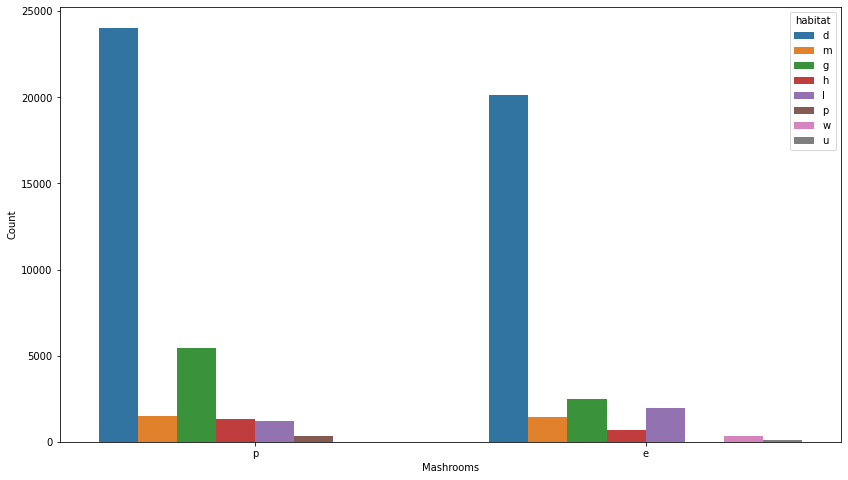

In [78]:
plt.figure(figsize=(14,8))

sns.countplot(x = 'class', hue='habitat', data = df)
plt.xlabel('Mashrooms')
plt.ylabel('Count')
plt.title('')

plt.show()

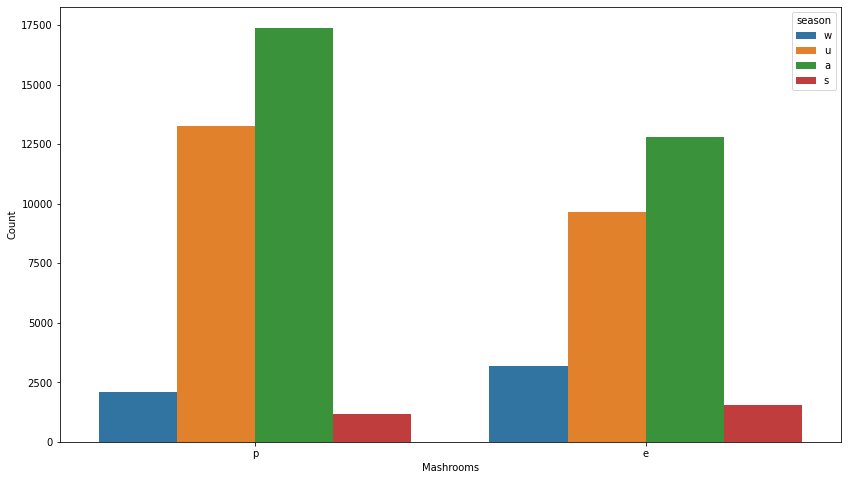

In [79]:
plt.figure(figsize=(14,8))

sns.countplot(x = 'class', hue='season', data = df)
plt.xlabel('Mashrooms')
plt.ylabel('Count')
plt.title('')

plt.show()

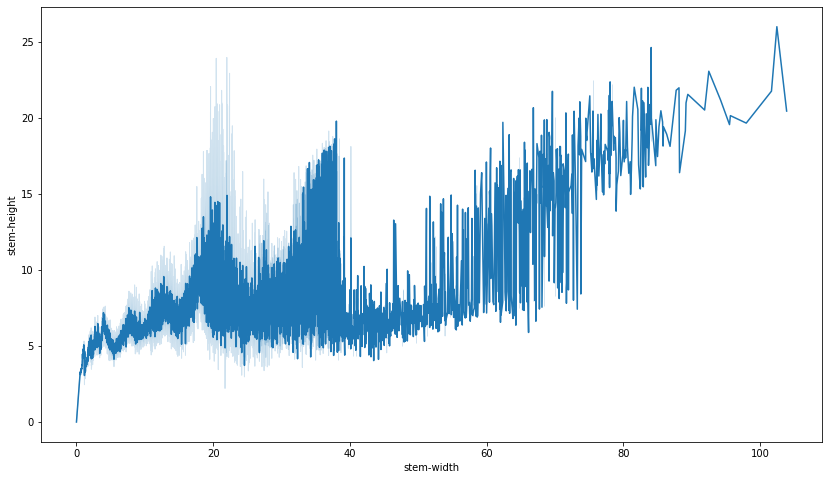

In [92]:
plt.figure(figsize=(14,8))

sns.lineplot(x ='stem-width', y='stem-height', data = df)
plt.xlabel('stem-width')
plt.ylabel('stem-height')
plt.title('')

plt.show()

Text(0.5, 1.0, '')

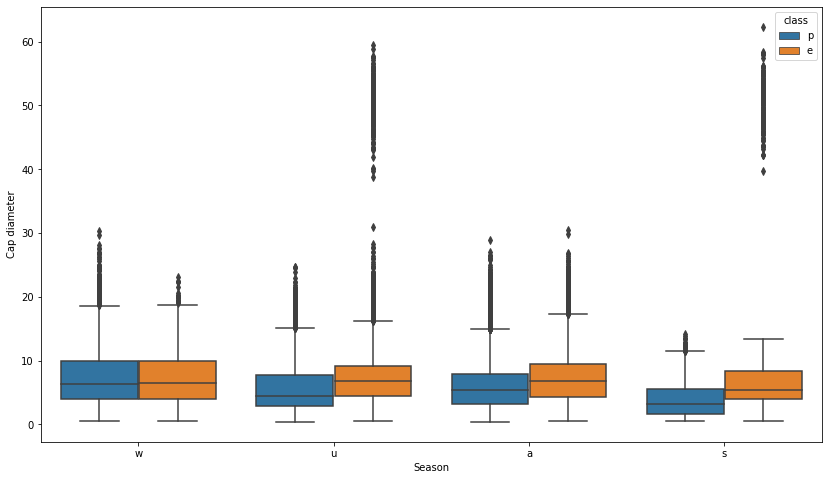

In [82]:
plt.figure(figsize=(14,8))
sns.boxplot(data=df, x = 'season', y = 'cap-diameter', hue='class')
plt.xlabel('Season')
plt.ylabel('Cap diameter')
plt.title('')

<function matplotlib.pyplot.show(*args, **kw)>

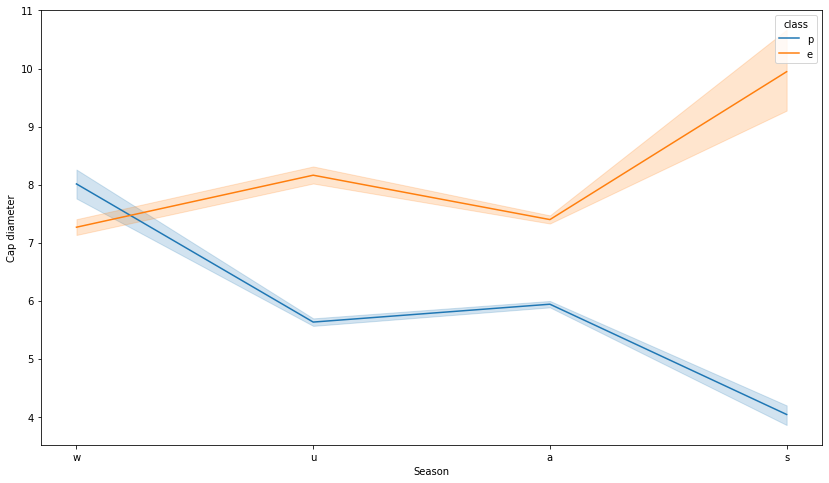

In [97]:
plt.figure(figsize=(14,8))

sns.lineplot(data=df, x = 'season', y = 'cap-diameter', hue='class')
plt.xlabel('Season')
plt.ylabel('Cap diameter')
plt.title('')

plt.show()

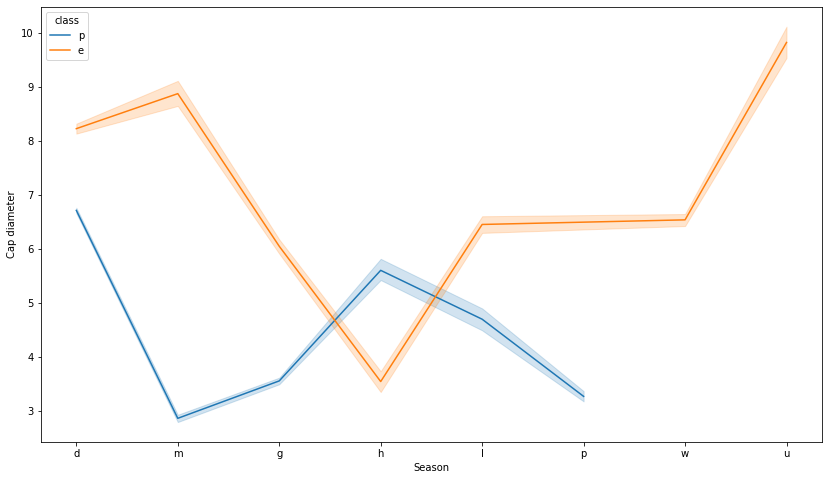

In [98]:
plt.figure(figsize=(14,8))

sns.lineplot(data=df, x = 'habitat', y = 'cap-diameter', hue='class')
plt.xlabel('Season')
plt.ylabel('Cap diameter')
plt.title('')

plt.show()

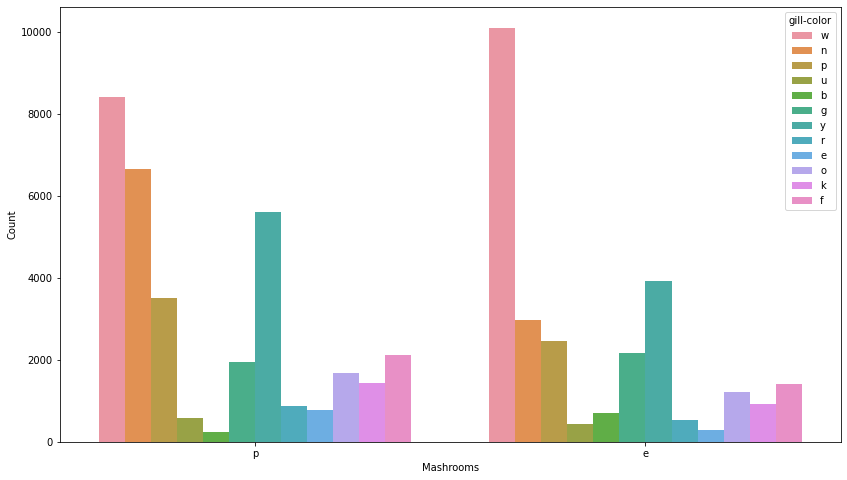

In [100]:
plt.figure(figsize=(14,8))

sns.countplot(x = 'class', hue='gill-color', data = df)
plt.xlabel('Mashrooms')
plt.ylabel('Count')
plt.title('')

plt.show()

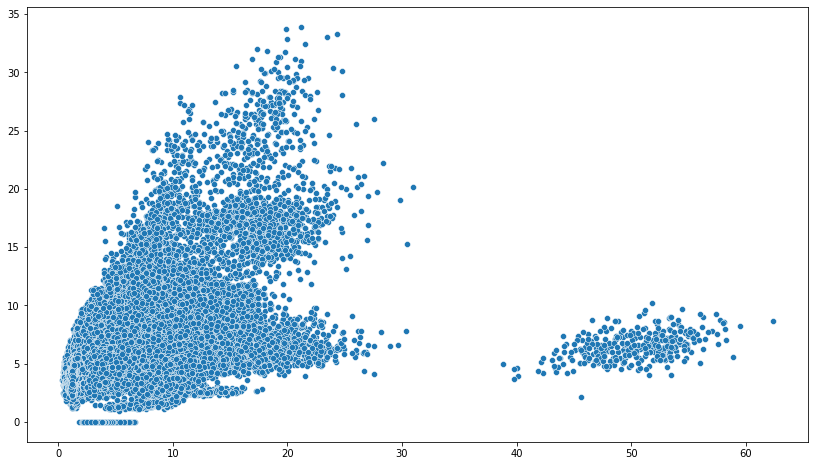

In [101]:
plt.figure(figsize=(14,8))

sns.scatterplot(data=df, x="cap-diameter", y="stem-height")
plt.xlabel('')
plt.ylabel('')
plt.title('')

plt.show()

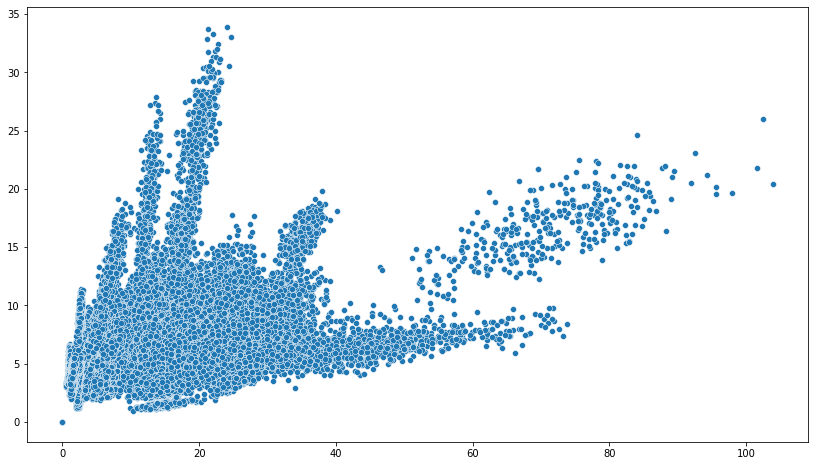

In [102]:
plt.figure(figsize=(14,8))

sns.scatterplot(data=df, x="stem-width", y="stem-height")
plt.xlabel('')
plt.ylabel('')
plt.title('')

plt.show()

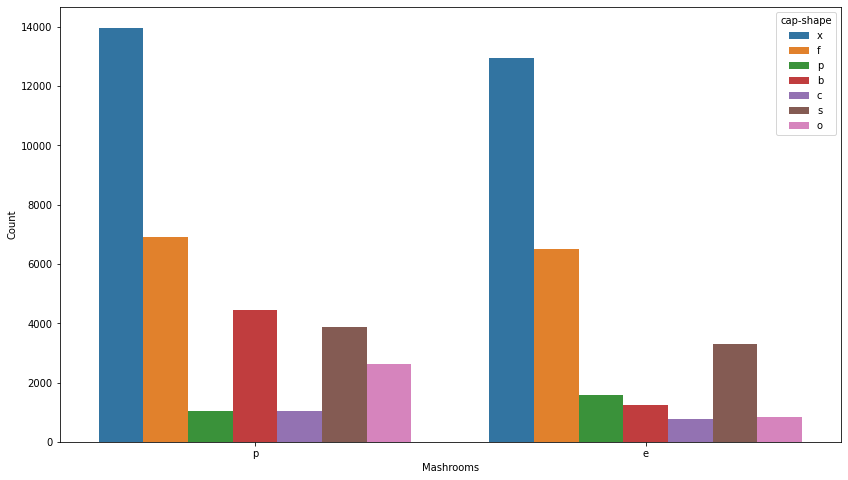

In [103]:
plt.figure(figsize=(14,8))

sns.countplot(x = 'class', hue='cap-shape', data = df)
plt.xlabel('Mashrooms')
plt.ylabel('Count')
plt.title('')

plt.show()

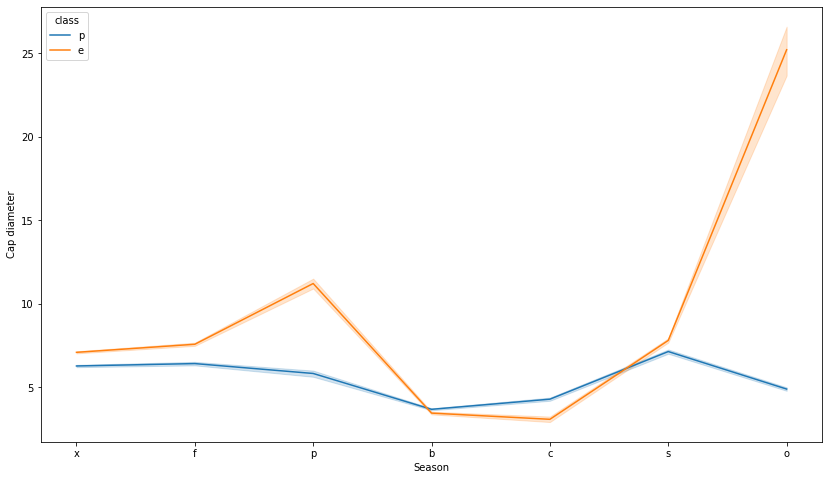

In [104]:
plt.figure(figsize=(14,8))

sns.lineplot(data=df, x = 'cap-shape', y = 'cap-diameter', hue='class')
plt.xlabel('Season')
plt.ylabel('Cap diameter')
plt.title('')

plt.show()